# Spark Funds
## An Investment Case Study by Nurul Quamar Khan

1. **Problem Statement:** Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

2. **Business objective:** The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

# Import Statements

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data from files

In [81]:
companies = pd.read_csv('companies.txt', sep="\t", header = 0, encoding = "ANSI",verbose=True, skipinitialspace=True)
rounds2 = pd.read_csv("rounds2.csv", sep=",", header = 0, encoding = "ANSI",verbose=True, skipinitialspace=True)

Tokenization took: 91.25 ms
Type conversion took: 374.02 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 0.47 ms
Type conversion took: 5.05 ms
Parser memory cleanup took: 0.00 ms
Tokenization took: 67.18 ms
Type conversion took: 334.90 ms
Parser memory cleanup took: 0.00 ms


# Data Cleaning

In [82]:
# Printing the head of companies dataframe
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [83]:
# Printing the head of rounds2 dataframe
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000000
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000


In [84]:
# Renaming the column names in 'companies' dataframe to match with 'rounds2' dataframe
companies.rename(columns={'permalink': 'company_permalink'}, inplace=True)
companies.head()

# Convert the 'company_permalink' values to lower case in both the tables to make the mapping more accurate
companies['company_permalink'] = companies['company_permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [85]:
# Describe the table to obtain the Unique values for company_permalink column (Method 1)
companies.describe()

,company_permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/organization/zinc-save,Peach,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [86]:
# Use the unique() to find the Unique values for company_permalink column (Method 2)
print(len(rounds2.company_permalink.unique().tolist()))

66368


In [87]:
# Get the difference in the values of column 'company_permalink' for both the tables
print(len(np.setdiff1d(rounds2.company_permalink.unique().tolist(),companies.company_permalink.unique().tolist())))

0


## Merging the data frames

In [88]:
master_frame = pd.merge(rounds2, companies, how = 'inner', on = 'company_permalink')
# get the number of observations for master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


## Handling missing values

In [89]:
# check the count of non-null values for columns
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 15 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(14)
memory usage: 14.0+ MB


In [90]:
# get the number of null values in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [91]:
# get the percentage of null values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.000000
funding_round_permalink    0.000000
funding_round_type         0.000000
funding_round_code        72.910000
funded_at                  0.000000
raised_amount_usd         17.390000
name                       0.000000
homepage_url               5.340000
category_list              2.970000
status                     0.000000
country_code               7.550000
state_code                 9.520000
region                     8.840000
city                       8.840000
founded_at                17.850000
dtype: float64

In [92]:
# since most of our calculations will be based around the raised_amount_usd value, we will handle the missing values for
# this column first. We will replace the missing values by the median value to achieve this.

master_frame["raised_amount_usd"] = master_frame["raised_amount_usd"].apply(lambda x: master_frame['raised_amount_usd'].median(skipna=True) if (np.isnan(x) or x==0) else x)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000000,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000000,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [93]:
# Check for null values.
# Now there are no null values in our main columns: company_permalink, raised_amount_usd, category_list
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd              0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [94]:
pd.set_option('float_format', '{:f}'.format)
# get the average amount of amount raised grouped by the type of funding round
master_frame.groupby('funding_round_type', as_index=False)['raised_amount_usd'].mean().sort_values(by='raised_amount_usd',ascending=False)

,funding_round_type,raised_amount_usd
6,post_ipo_debt,168704571.822368
7,post_ipo_equity,80920707.305643
8,private_equity,62370667.823632
10,secondary_market,26302338.084211
2,debt_financing,16575269.472806
13,venture,10794401.604155
12,undisclosed,7359446.975291
4,grant,4211592.728636
1,convertible_note,1521875.017061
9,product_crowdfunding,1398104.636585


In [95]:
# get the entries which have 'venture' as funding round type and group them by country code displayed against the total amount of usd raised
venture_country = master_frame[(master_frame['funding_round_type'] == 'venture')].groupby(['country_code'])["raised_amount_usd"].sum().sort_values(ascending=False).reset_index()

# get the top 9 entries
venture_country = venture_country.head(9)
print(venture_country)

  country_code   raised_amount_usd
0          USA 426297034079.000000
1          CHN  40714326026.000000
2          GBR  20664074655.000000
3          IND  14675865077.000000
4          CAN   9734578307.000000
5          FRA   7373811480.000000
6          ISR   7099092833.000000
7          DEU   6733477352.000000
8          JPN   3437619095.000000


In [96]:
# get the entries which have the funding round type as venture and the country code belongs to the top 9 countries listed in venture_country
top9 = master_frame[(master_frame['funding_round_type'] == 'venture') & (master_frame.country_code.isin(venture_country.country_code.tolist()))]
print(top9.head())

                     company_permalink  \
0                  /organization/-fame   
1               /organization/-qounter   
4                /organization/0-6-com   
5       /organization/004-technologies   
8  /organization/0ndine-biomedical-inc   

                           funding_round_permalink funding_round_type  \
0  /funding-round/9a01d05418af9f794eebff7ace91f638            venture   
1  /funding-round/22dacff496eb7acb2b901dec1dfe5633            venture   
4  /funding-round/5727accaeaa57461bd22a9bdd945382d            venture   
5  /funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830            venture   
8  /funding-round/954b9499724b946ad8c396a57a5f3b72            venture   

  funding_round_code   funded_at  raised_amount_usd                    name  \
0                  B  05-01-2015    10000000.000000                   #fame   
1                  A  14-10-2014     1680511.000000                :Qounter   
4                  A  19-03-2008     2000000.000000                 0-6

In [97]:
# as discussed: the first string before the vertical bar will be considered the primary sector
top9['category_list'] = top9['category_list'].str.split('|').str.get(0)
top9.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,Application Platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680511.000000,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000000,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [98]:
# convert the values in categories_list to lower case to avoid case sensitive mismatches 
top9['category_list'] = top9['category_list'].str.lower()
top9.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,1680511.000000,:Qounter,http://www.qounter.com,application platforms,operating,USA,DE,DE - Other,Delaware City,04-09-2014
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000000,0-6.com,http://www.0-6.com,curated web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,1680511.000000,004 Technologies,http://004gmbh.de/en/004-interact,software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.000000,Ondine Biomedical Inc.,http://ondinebio.com,biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997


In [99]:
# Import the mapping csv file
mapping=pd.read_csv('mapping.csv', skipinitialspace=True)
mapping['category_list'] = mapping['category_list'].str.lower()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1


In [100]:
# Remove the NA Values
mapping.dropna(subset=['category_list'], how='all', inplace = True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


In [101]:
# Get the list of primary categories
primary_categories = list(mapping.columns.values)[1:]
print(primary_categories)

['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [102]:
# Merge the datframes using the category_list column
mf_sector_mapped= top9.merge(mapping,on='category_list')
mf_sector_mapped.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,founded_at,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000000,#fame,http://livfame.com,media,operating,...,NaN,0,0,0,1,0,0,0,0,0
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.000000,90min,http://www.90min.com,media,operating,...,01-01-2011,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,All Def Digital,http://alldefdigital.com,media,operating,...,NaN,0,0,0,1,0,0,0,0,0


In [103]:
# Get the name of category corresponding to the category_list
cat_list = []
for index, row in mf_sector_mapped.iterrows():
    for catName in primary_categories:
        if(row[catName] == 1):
            cat_list.append(catName)
            break
mf_sector_mapped['Category'] = cat_list
mf_sector_mapped.head()

# Assign the category as 'Others' for the category_list type 'others'
for index, row in mf_sector_mapped.iterrows():
        if(row['category_list'].lower() == 'others'):
            mf_sector_mapped['Category'] = 'Others'

In [104]:
# Rename the category column to main_sector
print(mf_sector_mapped.columns)
mf_sector_mapped.rename(columns={'Category': 'main_sector'}, inplace=True)
print(mf_sector_mapped.columns)

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising', 'Category'],
      dtype='object')
Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd', 'name',
       'homepage_url', 'category_list', 'status', 'country_code', 'state_code',
       'region', 'city', 'founded_at', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising', 'main_sec

In [105]:
# Change the datatype of raised_amount_usd to float
mf_sector_mapped['raised_amount_usd'] = mf_sector_mapped['raised_amount_usd'].astype('float')

In [106]:
# create new dataframes for USA, GBR and IND where the investments are between 5 to 15 Million USD
invest_usa = mf_sector_mapped[(mf_sector_mapped['country_code']=='USA') & (mf_sector_mapped['raised_amount_usd']>=5000000) & (mf_sector_mapped['raised_amount_usd']<=15000000)]
invest_gbr = mf_sector_mapped[(mf_sector_mapped['country_code']=='GBR') & (mf_sector_mapped['raised_amount_usd']>=5000000) & (mf_sector_mapped['raised_amount_usd']<=15000000)]
invest_ind = mf_sector_mapped[(mf_sector_mapped['country_code']=='IND') & (mf_sector_mapped['raised_amount_usd']>=5000000) & (mf_sector_mapped['raised_amount_usd']<=15000000)]

print(" * "*20+" USA "+" * "*20)
print(invest_usa.info())
print(" * "*20+" GBR "+" * "*20)
print(invest_gbr.info())
print(" * "*20+" IND "+" * "*20)
print(invest_ind.info())

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  USA  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 11149 entries, 4 to 44452
Data columns (total 25 columns):
company_permalink                          11149 non-null object
funding_round_permalink                    11149 non-null object
funding_round_type                         11149 non-null object
funding_round_code                         7893 non-null object
funded_at                                  11149 non-null object
raised_amount_usd                          11149 non-null float64
name                                       11149 non-null object
homepage_url                               10605 non-null object
category_list                              11149 non-null object
status                                     11149 non-null object
country_code                               11149 non-null object
state_code                                 11147 n

In [107]:
invest_usa.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,...,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.000000,All Def Digital,http://alldefdigital.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.000000,ChefsFeed,http://www.chefsfeed.com,media,operating,...,0,0,0,1,0,0,0,0,0,Entertainment
21,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.000000,The Huffington Post,http://www.huffingtonpost.com,media,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
22,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.000000,The Huffington Post,http://www.huffingtonpost.com,media,acquired,...,0,0,0,1,0,0,0,0,0,Entertainment
28,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.000000,MatchMine,http://matchmine.com,media,closed,...,0,0,0,1,0,0,0,0,0,Entertainment


In [108]:
# create the dataframes for the number of investments and total amount invested for USA
usa_no_of_invest = list(invest_usa.groupby(['main_sector']).count()['company_permalink'])
usa_sum_of_invest = list(invest_usa.groupby(['main_sector'])['raised_amount_usd'].sum())

D1 = invest_usa.groupby(['main_sector']).count()
D1['Number of Investments'] = usa_no_of_invest
D1['Total Investment'] = usa_sum_of_invest

# Filter only the needed columns
D1 = D1.filter(['Number of Investments','Total Investment'], axis=1).sort_values(by='Total Investment',ascending=False)

# Add a sum row
D1.loc['sum'] = D1.sum()
print(D1)

                                         Number of Investments  \
main_sector                                                      
Others                                             2923.000000   
Cleantech / Semiconductors                         2297.000000   
Social, Finance, Analytics, Advertising            1912.000000   
News, Search and Messaging                         1563.000000   
Health                                              908.000000   
Manufacturing                                       799.000000   
Entertainment                                       580.000000   
Automotive & Sports                                 167.000000   
sum                                               11149.000000   

                                          Total Investment  
main_sector                                                 
Others                                  26089280296.000000  
Cleantech / Semiconductors              21181003033.000000  
Social, Finance, Analytics, A

In [109]:
# create the dataframes for the number of investments and total amount invested for GBR
gbr_no_of_invest = list(invest_gbr.groupby(['main_sector']).count()['company_permalink'])
gbr_sum_of_invest = list(invest_gbr.groupby(['main_sector'])['raised_amount_usd'].sum())
D2 = invest_gbr.groupby(['main_sector']).count()
D2['Number of Investments'] = gbr_no_of_invest
D2['Total Investment'] = gbr_sum_of_invest

# Filter only the needed columns
D2 = D2.filter(['Number of Investments','Total Investment'], axis=1).sort_values(by='Total Investment',ascending=False)

# Add a sum row
D2.loc['sum'] = D2.sum()
print(D2)

                                         Number of Investments  \
main_sector                                                      
Others                                              143.000000   
Cleantech / Semiconductors                          127.000000   
Social, Finance, Analytics, Advertising              98.000000   
News, Search and Messaging                           73.000000   
Entertainment                                        54.000000   
Manufacturing                                        42.000000   
Health                                               24.000000   
Automotive & Sports                                  16.000000   
sum                                                 577.000000   

                                         Total Investment  
main_sector                                                
Others                                  1249124289.000000  
Cleantech / Semiconductors              1136905008.000000  
Social, Finance, Analytics, Adver

In [110]:
# create the dataframes for the number of investments and total amount invested for IND
ind_no_of_invest = list(invest_ind.groupby(['main_sector']).count()['company_permalink'])
ind_sum_of_invest = list(invest_ind.groupby(['main_sector'])['raised_amount_usd'].sum())
D3 = invest_ind.groupby(['main_sector']).count()
D3['Number of Investments'] = ind_no_of_invest
D3['Total Investment'] = ind_sum_of_invest

# Filter only the needed columns
D3 = D3.filter(['Number of Investments','Total Investment'], axis=1).sort_values(by='Total Investment',ascending=False)

# Add a sum row
D3.loc['sum'] = D3.sum()
print(D3)

                                         Number of Investments  \
main_sector                                                      
Others                                              109.000000   
News, Search and Messaging                           52.000000   
Social, Finance, Analytics, Advertising              32.000000   
Entertainment                                        33.000000   
Manufacturing                                        21.000000   
Health                                               19.000000   
Cleantech / Semiconductors                           20.000000   
Automotive & Sports                                  13.000000   
sum                                                 299.000000   

                                         Total Investment  
main_sector                                                
Others                                  1007409507.000000  
News, Search and Messaging               433834545.000000  
Social, Finance, Analytics, Adver

In [111]:
#Get the name of companies with highest investment for each country
print(invest_usa[(invest_usa['main_sector'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])
print(invest_gbr[(invest_gbr['main_sector'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])
print(invest_ind[(invest_ind['main_sector'] == 'Others')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])

name
Virtustream   64300000.000000
Name: raised_amount_usd, dtype: float64
name
Electric Cloud   37000000.000000
Name: raised_amount_usd, dtype: float64
name
FirstCry.com   39000000.000000
Name: raised_amount_usd, dtype: float64


In [112]:
# Get the name of company with highest investment for specific sectors for each country
print(invest_usa[(invest_usa['main_sector'] == 'Cleantech / Semiconductors')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])
print(invest_gbr[(invest_gbr['main_sector'] == 'Cleantech / Semiconductors')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])
print(invest_ind[(invest_ind['main_sector'] == 'News, Search and Messaging')].groupby(['name'])["raised_amount_usd"].sum().sort_values(ascending=False)[:1])

name
Biodesix   75300000.000000
Name: raised_amount_usd, dtype: float64
name
EUSA Pharma   35600000.000000
Name: raised_amount_usd, dtype: float64
name
GupShup   33000000.000000
Name: raised_amount_usd, dtype: float64


In [113]:
# Get the fraction of total investments (globally) in venture, seed, and private equity. 

totalByRoundType = master_frame.groupby('funding_round_type',as_index=False)['raised_amount_usd'].sum()
totalAmountRaised = totalByRoundType['raised_amount_usd'].sum()
print("Total Amount Raised: "+str(totalAmountRaised))
totalByRoundType['investment_fraction'] = totalByRoundType['raised_amount_usd'].apply(lambda x: x/totalAmountRaised)
totalByRoundType = totalByRoundType[(totalByRoundType['funding_round_type']=='venture') | (totalByRoundType['funding_round_type']=='seed') | (totalByRoundType['funding_round_type']=='private_equity')]
totalByRoundType = totalByRoundType.filter(['funding_round_type','investment_fraction'], axis=1)
print(totalByRoundType)

Total Amount Raised: 1024415912090.0
   funding_round_type  investment_fraction
8      private_equity             0.139120
11               seed             0.028094
13            venture             0.584747


In [114]:
# Get the average investments (globally) in venture, seed, and private equity. 

avgByRoundType = master_frame.groupby('funding_round_type',as_index=False)['raised_amount_usd'].mean()
avgByRoundType.rename(columns={'raised_amount_usd': 'avg_amount_raised(Millions)'}, inplace=True)
avgByRoundType['avg_amount_raised(Millions)'] = avgByRoundType['avg_amount_raised(Millions)'].apply(lambda x: x/10000000)
avgByRoundType = avgByRoundType[(avgByRoundType['funding_round_type']=='venture') | (avgByRoundType['funding_round_type']=='seed') | (avgByRoundType['funding_round_type']=='private_equity')] 
print(avgByRoundType)

   funding_round_type  avg_amount_raised(Millions)
8      private_equity                     6.237067
11               seed                     0.094288
13            venture                     1.079440


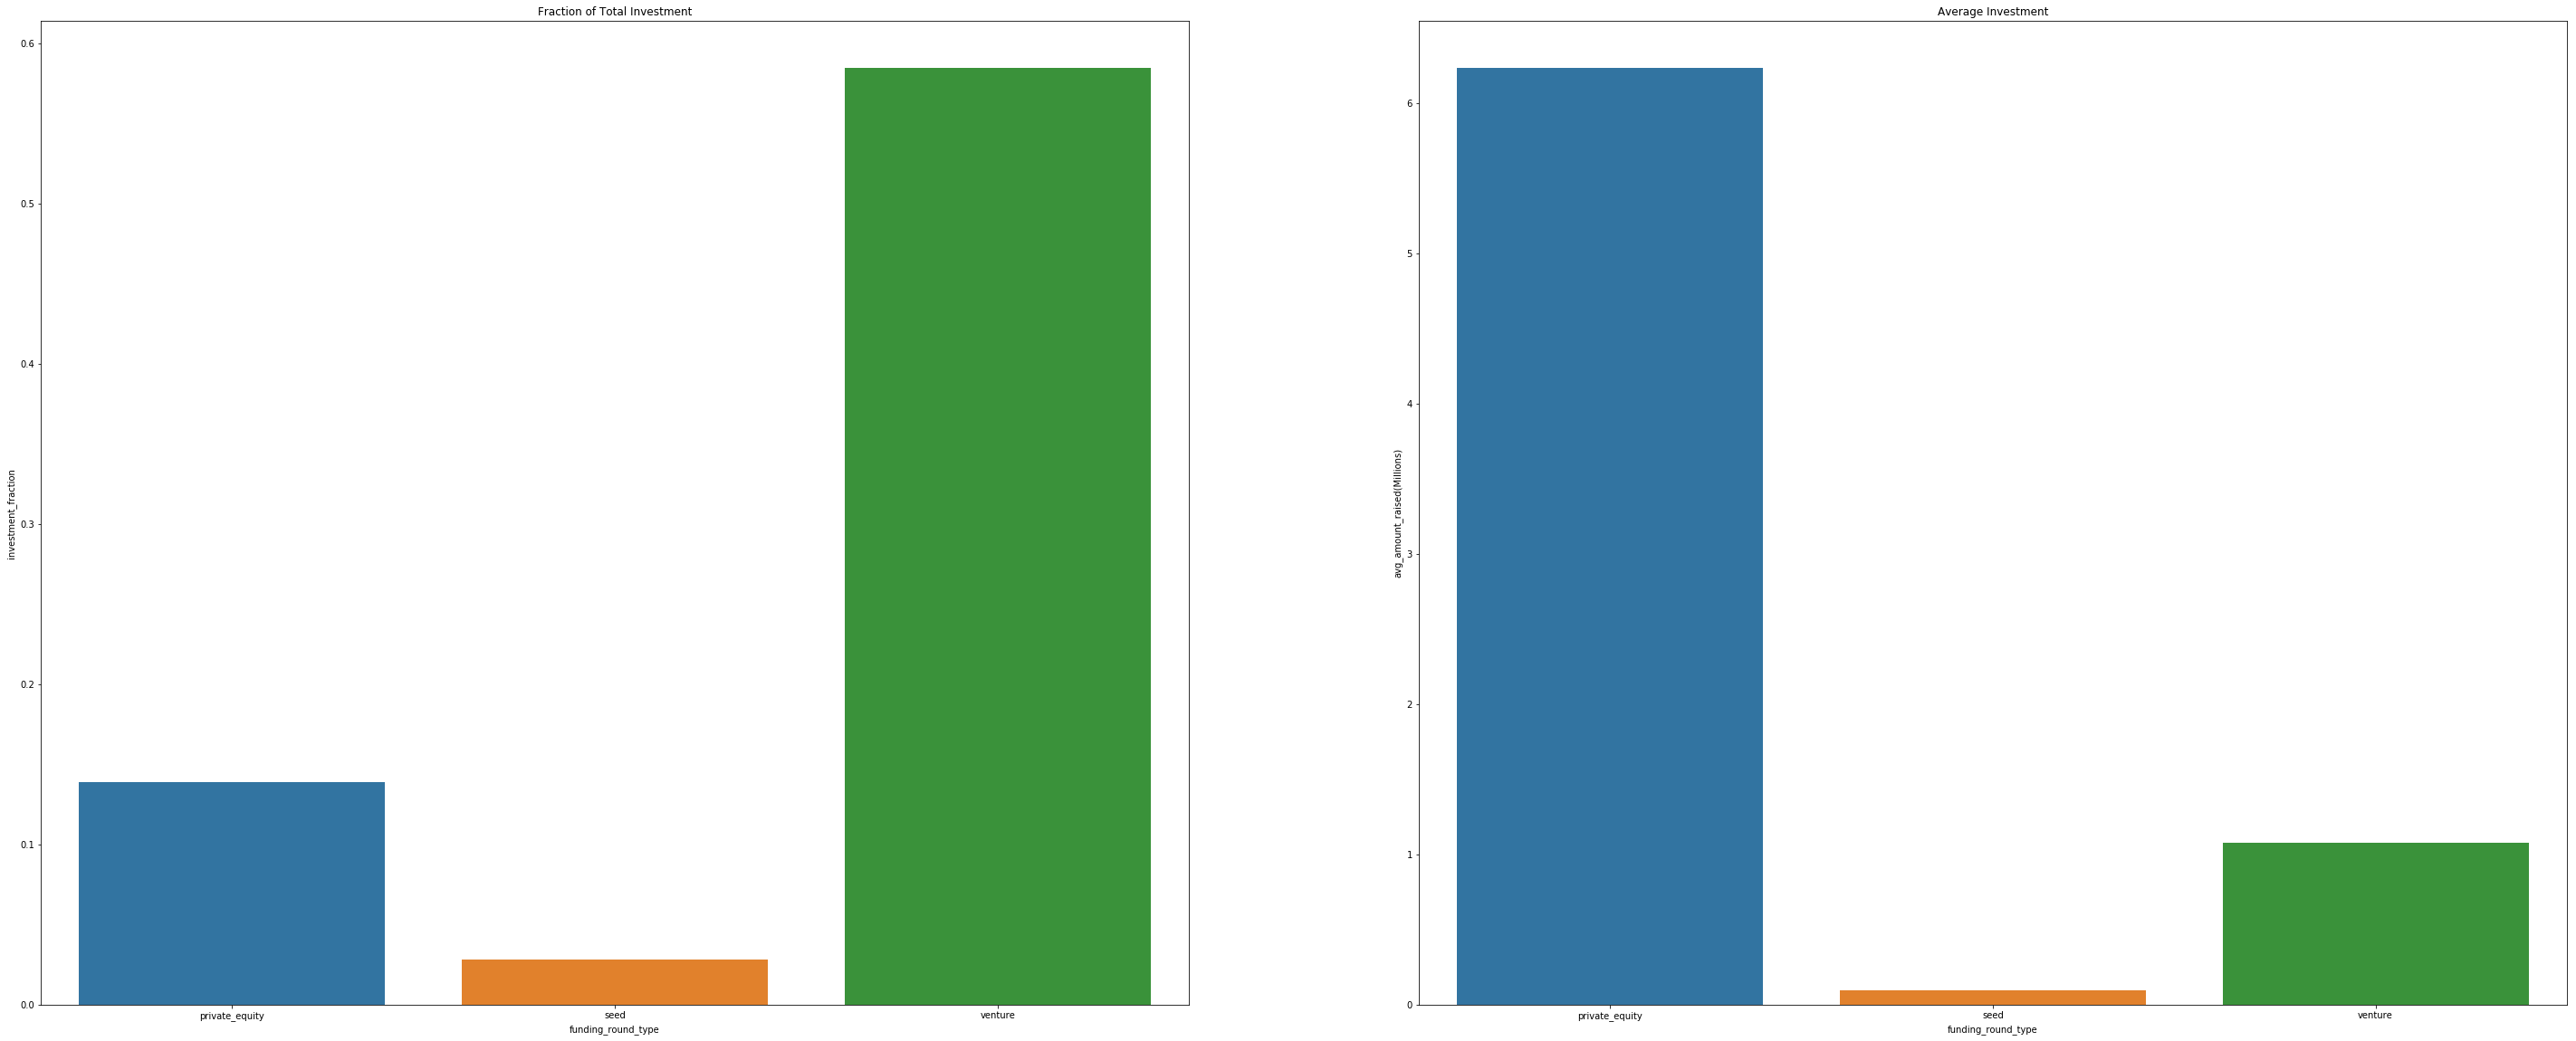

In [115]:
# increase figure size 
plt.figure(figsize=(50, 20))

# Plot to show the Fraction of investment from each sector
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='investment_fraction', data=totalByRoundType)
plt.title("Fraction of Total Investment")

# Plot to show the average investment per sector
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='avg_amount_raised(Millions)', data=avgByRoundType)
plt.title("Average Investment")

plt.show()

In [116]:
# get the entries with funding type as venture
master_frame = master_frame[master_frame['funding_round_type']=='venture']

countryWiseInvestment = master_frame.groupby('country_code',as_index=False)['raised_amount_usd'].sum().sort_values(by='raised_amount_usd',ascending=False)
countryWiseInvestment = countryWiseInvestment[:9]
print(countryWiseInvestment)

    country_code   raised_amount_usd
100          USA 426297034079.000000
16           CHN  40714326026.000000
31           GBR  20664074655.000000
41           IND  14675865077.000000
13           CAN   9734578307.000000
30           FRA   7373811480.000000
44           ISR   7099092833.000000
23           DEU   6733477352.000000
47           JPN   3437619095.000000


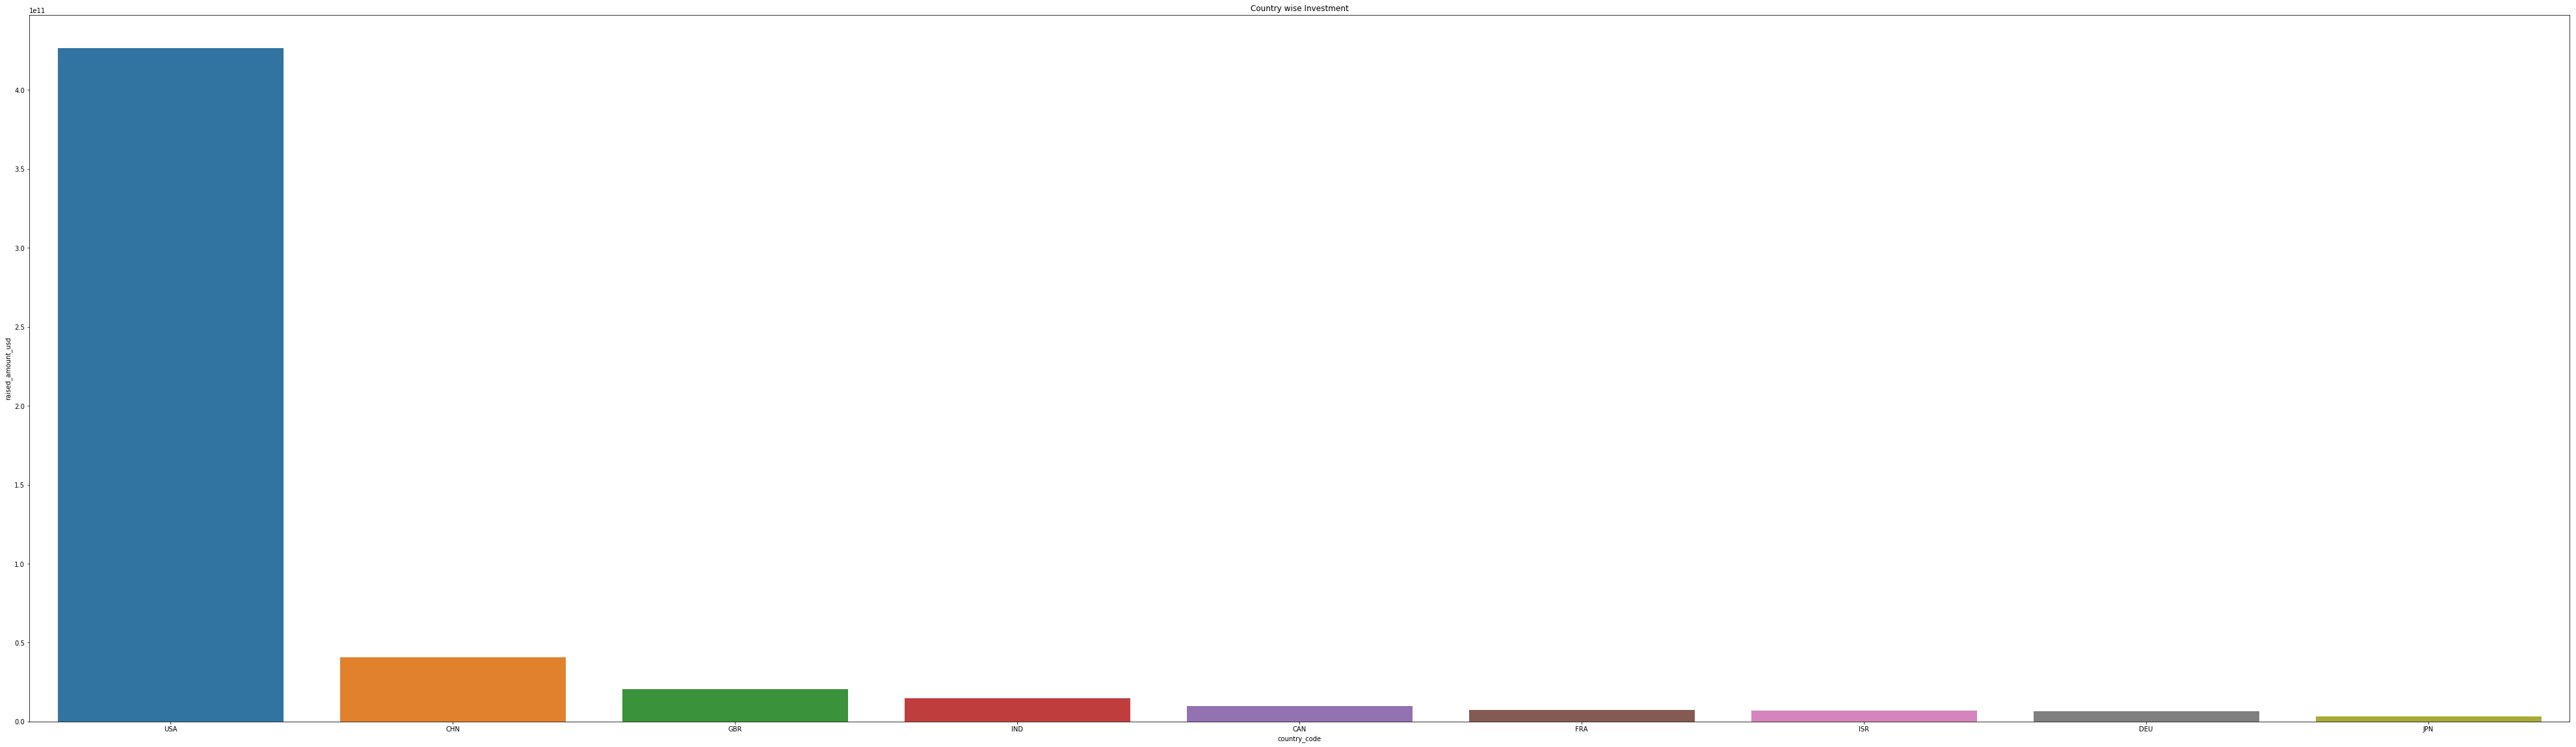

In [122]:
# increase figure size
plt.figure(figsize=(70, 20))

#plot to show the country wise investment
sns.barplot(x='country_code', y='raised_amount_usd', data=countryWiseInvestment)
plt.title("Country wise Investment")
plt.show()

In [118]:
# Get the entries for USA
USA_InvestmentCount = mf_sector_mapped[mf_sector_mapped['country_code']=='USA']
USA_InvestmentCount = USA_InvestmentCount.groupby('main_sector', as_index=False)['company_permalink'].count().sort_values(by='company_permalink',ascending=False)[:3]
USA_InvestmentCount.rename(columns={'company_permalink': 'No. of investments'}, inplace=True)

# Get the entries for GBR
GBR_InvestmentCount = mf_sector_mapped[mf_sector_mapped['country_code']=='GBR']
GBR_InvestmentCount = GBR_InvestmentCount.groupby('main_sector', as_index=False)['company_permalink'].count().sort_values(by='company_permalink',ascending=False)[:3]
GBR_InvestmentCount.rename(columns={'company_permalink': 'No. of investments'}, inplace=True)

# Get the entries for IND
IND_InvestmentCount = mf_sector_mapped[mf_sector_mapped['country_code']=='IND']
IND_InvestmentCount = IND_InvestmentCount.groupby('main_sector', as_index=False)['company_permalink'].count().sort_values(by='company_permalink',ascending=False)[:3]
IND_InvestmentCount.rename(columns={'company_permalink': 'No. of investments'}, inplace=True)

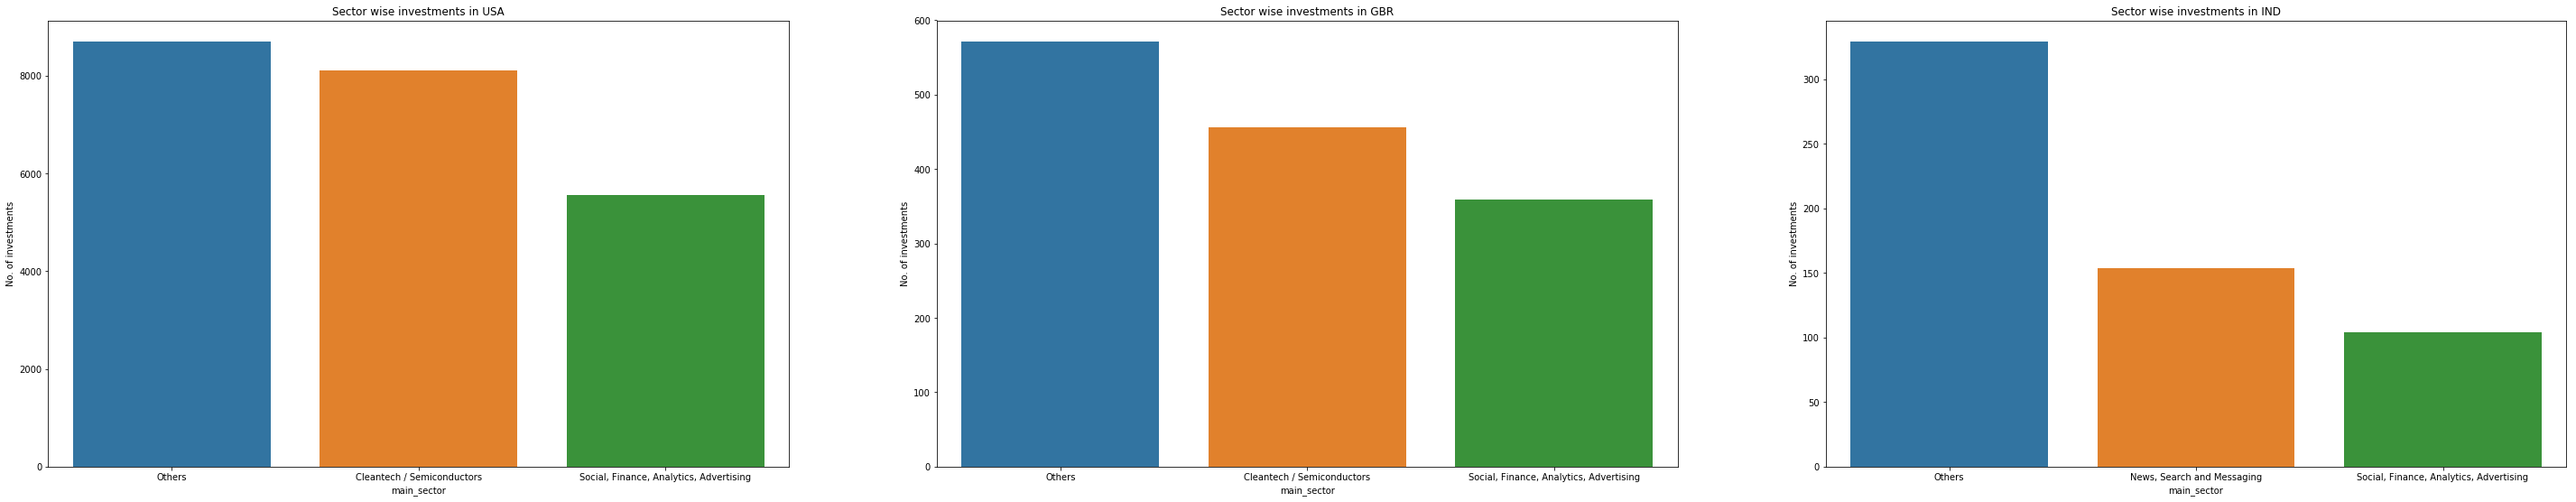

In [119]:
plt.figure(figsize=(50, 20))

plt.subplot(2, 3, 1)
sns.barplot(x='main_sector', y='No. of investments', data=USA_InvestmentCount)
plt.title("Sector wise investments in USA")

plt.subplot(2, 3, 2)
sns.barplot(x='main_sector', y='No. of investments', data=GBR_InvestmentCount)
plt.title("Sector wise investments in GBR")

plt.subplot(2, 3, 3)
sns.barplot(x='main_sector', y='No. of investments', data=IND_InvestmentCount)
plt.title("Sector wise investments in IND")

plt.show()